In [4]:
## jupyter notebook to simulate the range of the nuclear recoils in a given decay chain
## this notebook is tuned for the case of Rn-220 daughter implantation into 3 um SiO2 spheres

import numpy as np
import matplotlib.pyplot as plt
import alpha_recoil_sim as ar
import importlib

In [5]:
## make dictionary containing decay chain information for a given list of isotopes
path = "/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/alpha_recoils_Grimm/Sphere_Recoils_MC"

iso_list = ['Po-216']

iso_dict = {}

for iso in iso_list:
    ciso = iso[:2].lower()
    cA = iso[-3:]
    iso_dict[iso] = ar.parse_decay_chain(path + "/decay_data/" + ciso + "_" + cA + "_decay_chain.txt")

In [6]:
## Load the Monte Carlo data from SRIM
import pickle

data_path = '/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/alpha_recoils_Grimm/SRIM_Data/'

with open(data_path + 'SRIM_MC_events.pkl', 'rb') as f:
    MC_dict = pickle.load(f)

In [7]:
## Run over the isotopes and various shell materials, and save data
importlib.reload(ar)

remake_files = False

sim_name = "Pb212_implant"

nfiles = 10

if(remake_files):
    iso_list = ['Po-216']
    shell_mat = ['SiO2']
    shell_thick = [1500] ## 1 nm thick SiO2 shell for starting decays
    N = 1000000


    for nf in range(nfiles):

        out_path = '/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/alpha_recoils_Grimm/SRIM_Data/'

        sim_dict = {}

        for iso in iso_list:
            for j,shell in enumerate(shell_mat):

                print("Working on %d events for %s with %s shell"%(N, iso, shell))

                sphere_dict = {"inner_radius": 1, "outer_shell_thick": shell_thick[j], 
                            "inner_material": "SiO2", "shell_material": shell,
                            "starting_loc": "shell"}

                sim_dict[iso + "_" + shell] = ar.sim_N_events(N, iso, iso_dict, sphere_dict, MC_dict)

        with open(data_path + 'simulation_data_%s_%d.pkl'%(sim_name, nf), 'wb') as f:
            pickle.dump(sim_dict, f)
else: 
    
    with open(data_path + 'simulation_data_%s_0.pkl'%sim_name, 'rb') as f:
       sim_dict = pickle.load(f)

In [10]:
importlib.reload(ar)

iso = "Po-216"
shell = "SiO2"
num = 1

for num in range(10,20):
    fig = ar.plot_event(sim_dict[iso + "_" + shell][num], sphere_dict, rad_lims=[-1,-1], sphere_coords=True)
    #print(sim_dict[iso + "_" + shell][num]['final_momentum'], np.linalg.norm(sim_dict[iso + "_" + shell][num]['final_momentum']))
#plt.savefig(fig_path + "examp_traj_%s_%s_%d.png"%(iso, shell, num), dpi=300)

plt.show()

NameError: name 'sphere_dict' is not defined

Found 0 bad points out of 2000000: 0.000%


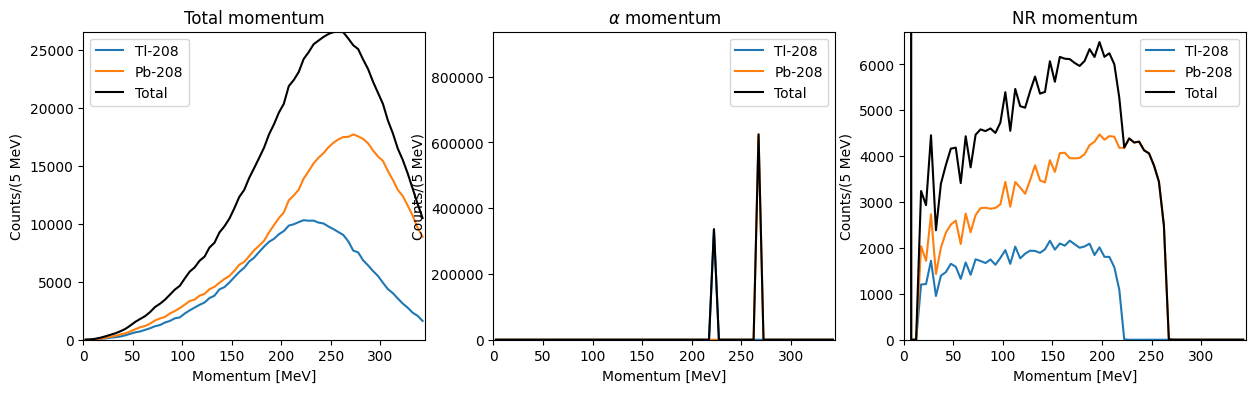

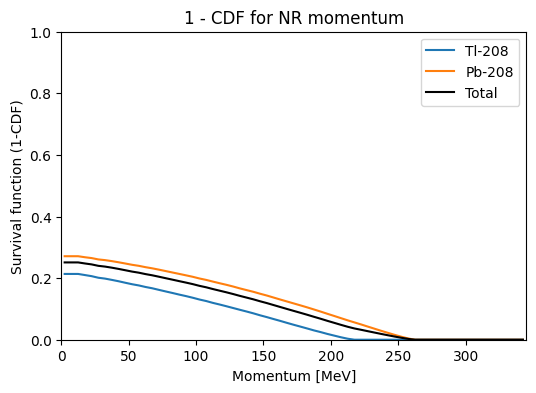

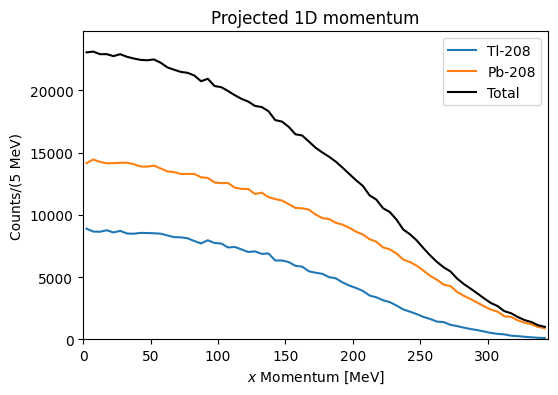

In [11]:
importlib.reload(ar)
ar.reconstruct_momenta(sim_dict['Po-216_SiO2'], add_noise={'x': [22, 25, 28, 30], 'y': [37], 'z': [60]})

In [13]:
with open(data_path + 'simulation_data_%s_1.pkl'%sim_name, 'rb') as f:
    sim_dict = pickle.load(f)

sim_dict[0]

Loading file 1 of 1
Found 0 bad points out of 1000000: 0.000%


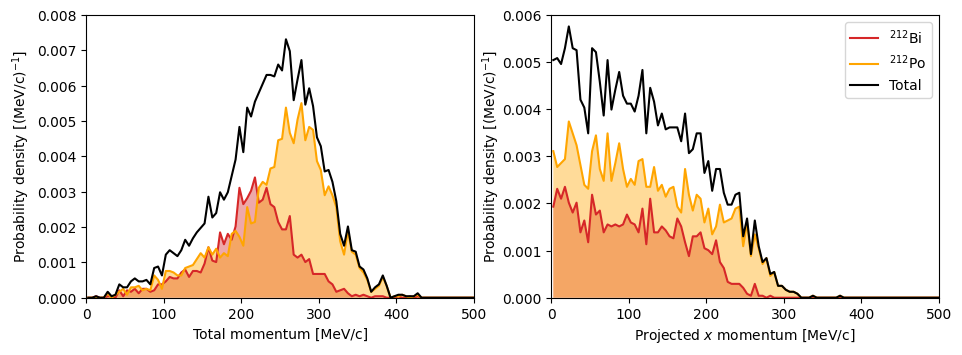

In [11]:
importlib.reload(ar)

file_base = data_path + 'simulation_data_%s_%%d.pkl'%sim_name                                                    

pdf_fig, bins, pdfs = ar.reconstruct_momenta_2panel(file_base, 10, add_noise={'x': [22, 25, 28, 30], 'y': [37], 'z': [60]})
plt.savefig("recon_momentum_MC.pdf", bbox_inches='tight')

np.savez("recoil_sim_pdfs.npz", bi_pdf=pdfs[0], po_pdf=pdfs[1], bins=bins)



In [21]:
importlib.reload(ar)
N=int(5e5)
sim_dict_single_pt = ar.sim_N_events(N, iso, iso_dict, sphere_dict, MC_dict, start_point=[1500,0,0])

Implantation efficiency:  0.476316
median:  28.680322283758073 60.13979597497043


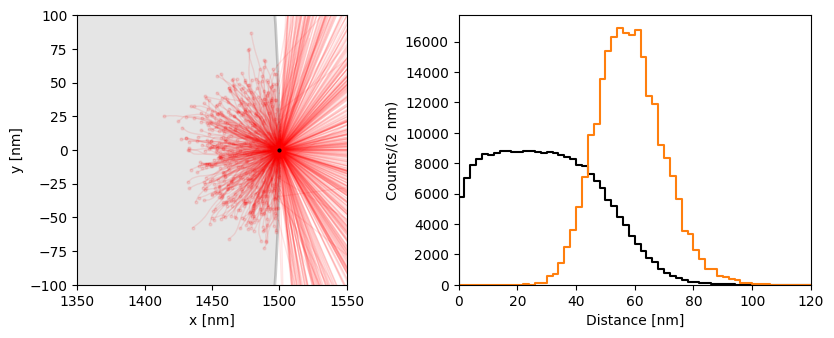

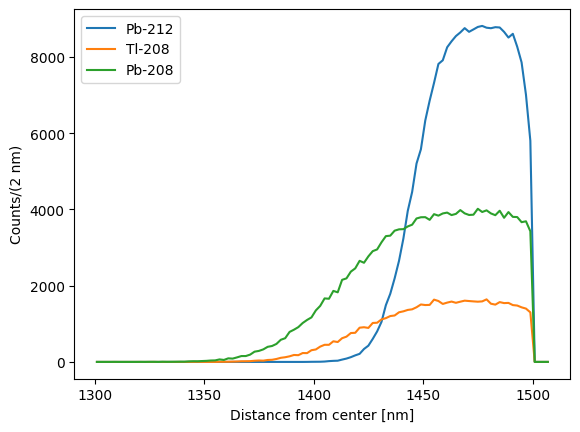

In [22]:
importlib.reload(ar)
ar.analyze_implantation(sim_dict_single_pt)

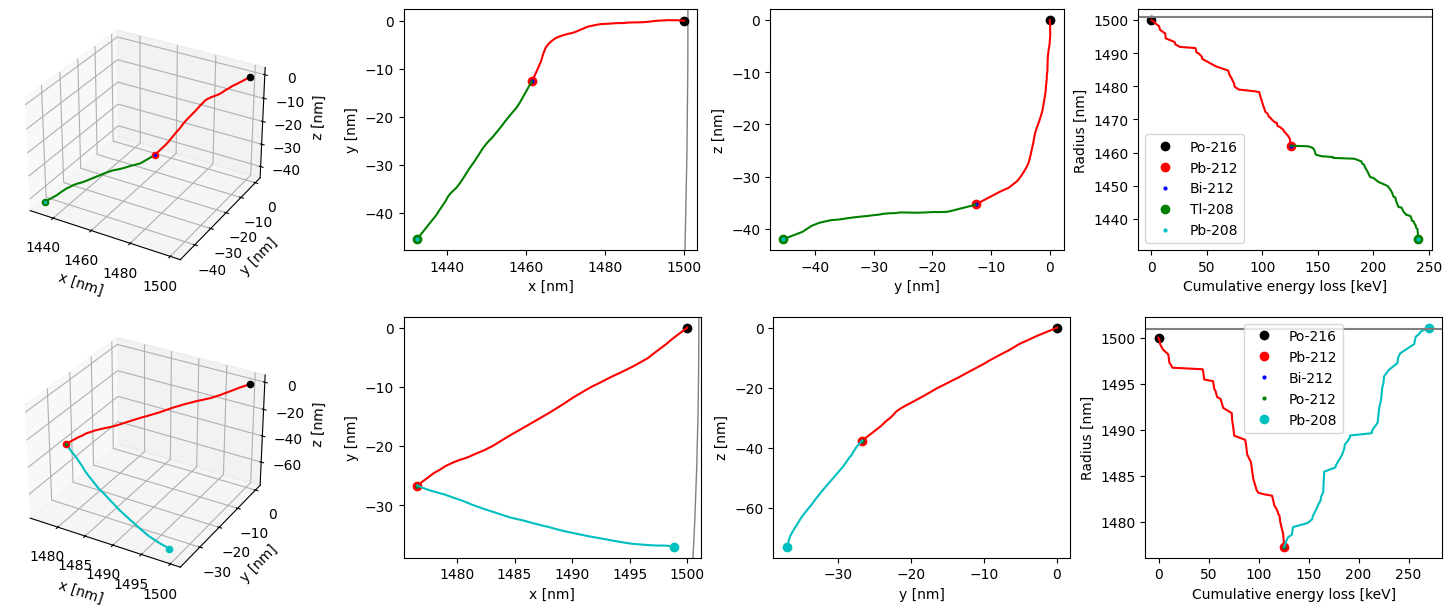

In [55]:
importlib.reload(ar)
fig = ar.plot_event_row(sim_dict_single_pt, [7,32], sphere_dict)
plt.savefig("example_events.pdf", bbox_inches='tight')

In [24]:
Ntot = int(1e5)
tot_implanted = 0
tot_ejected = 0
for i in range(Ntot):

    if(len(sim_dict['Po-216_SiO2'][i].keys()) <= 5): continue

    tot_implanted += 1

    if(np.linalg.norm(sim_dict['Po-216_SiO2'][i]['final_NR_momentum'])>0):
        tot_ejected += 1

print("Fraction implanted: ", tot_implanted/Ntot)
print("Fraction implanted than ejected: ", tot_ejected/tot_implanted)
print("Fraction ejected overall: ", tot_ejected/Ntot)

Fraction implanted:  0.47874
Fraction implanted than ejected:  0.24980156243472448
Fraction ejected overall:  0.11959


In [25]:
sim_dict[iso + "_" + shell][1][0]


{'time': 0.3512192434932654,
 'energy': 125.52407407407408,
 'iso': 'Pb-212',
 'alpha_momentum': array([-115.0035117 , -202.44258807,   -4.19414266]),
 'NR_momentum': array([0, 0, 0]),
 'traj': array([[ 1.25524074e+02,  4.24322706e+02, -9.40895900e+02,
         -1.08842324e+03],
        [ 1.04800000e+02,  4.24465180e+02, -9.40562238e+02,
         -1.08847421e+03],
        [ 8.69140000e+01,  4.24626785e+02, -9.40162720e+02,
         -1.08850664e+03],
        [ 8.58200000e+01,  4.24768698e+02, -9.39775422e+02,
         -1.08848704e+03],
        [ 8.40610000e+01,  4.25545312e+02, -9.37870601e+02,
         -1.08842101e+03],
        [ 8.37140000e+01,  4.25697529e+02, -9.37491160e+02,
         -1.08839493e+03],
        [ 8.26120000e+01,  4.26008307e+02, -9.36734266e+02,
         -1.08834800e+03],
        [ 8.18120000e+01,  4.26859699e+02, -9.34446092e+02,
         -1.08817790e+03],
        [ 8.09690000e+01,  4.27581600e+02, -9.32547982e+02,
         -1.08803910e+03],
        [ 7.67330000e+01

In [26]:
sim_dict[iso + "_" + shell][1][1]

{'time': 5914.703132268771,
 'energy': 0.0,
 'iso': 'Bi-212',
 'traj': array([[    0.        ,   450.55387969,  -873.81540046, -1082.89135246]])}

In [27]:
data = sim_dict[iso + "_" + shell][1][2]['traj']
data[-1,3]

-1142.9603240603026

In [28]:
sim_dict[iso + "_" + shell][1][3]

KeyError: 3

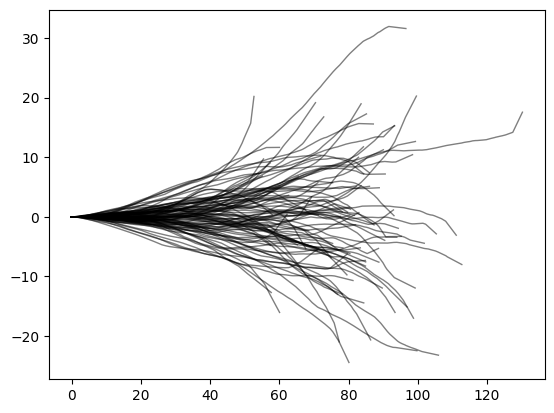

In [ ]:
plt.figure()

for n in range(1,100):
    curr_traj = MC_dict['Pb-212_SiO2'][n]

    plt.plot(curr_traj[:,1], curr_traj[:,2], 'k-', alpha=0.5, lw=1)

In [ ]:
importlib.reload(ar)
path = "/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/alpha_recoils_Grimm"
daught_file = path + "/recoil_cascades/TRANSMIT.txt"
recoil_file = path + "/recoil_cascades/TRANSREC.txt"
daught_dict, recoil_dict = ar.parse_transrec_file(daught_file, recoil_file)

Bad line:  993


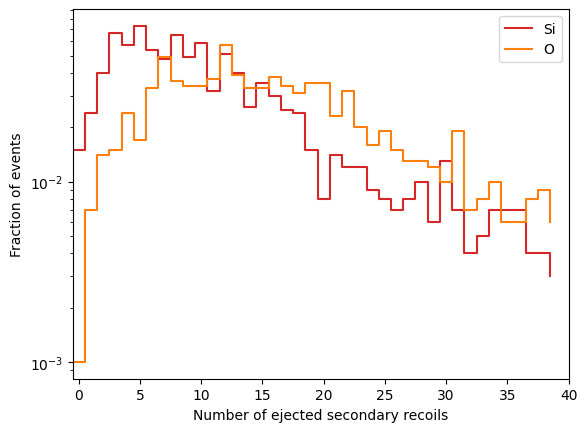

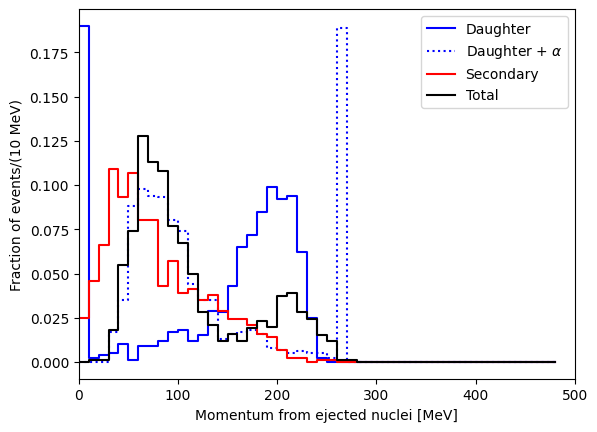

In [ ]:
importlib.reload(ar)
ar.analyze_trans_data(daught_dict, recoil_dict)

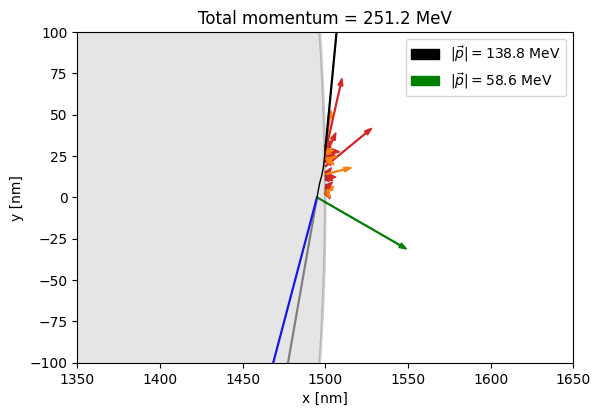

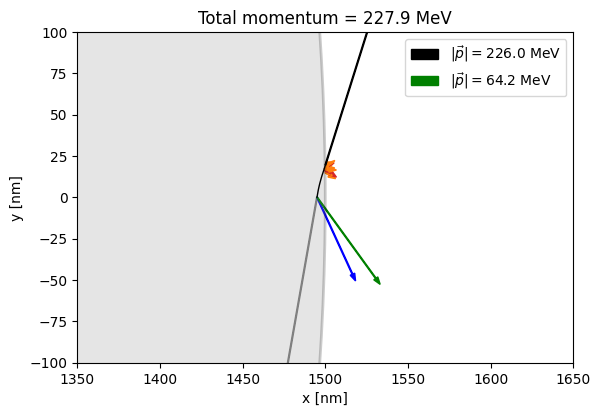

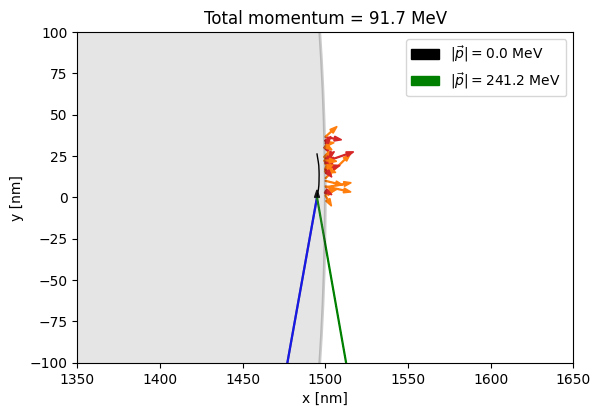

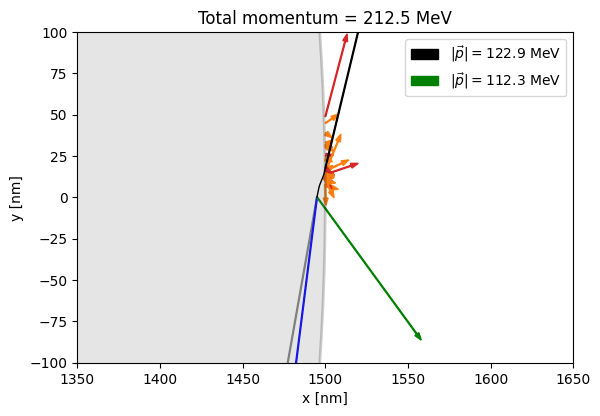

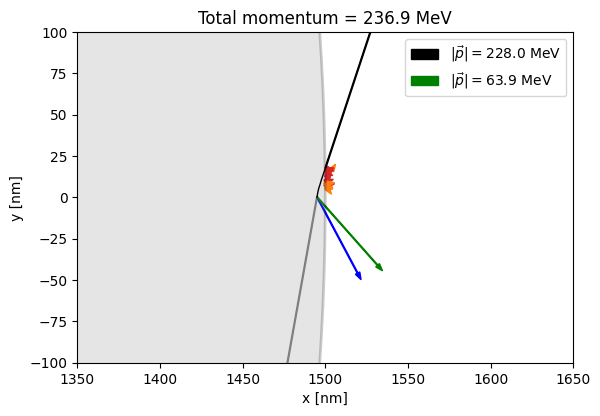

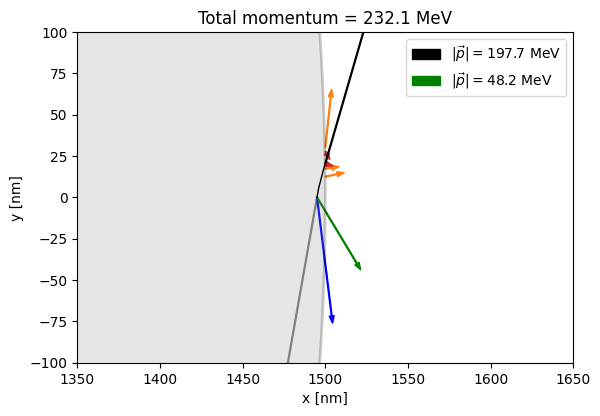

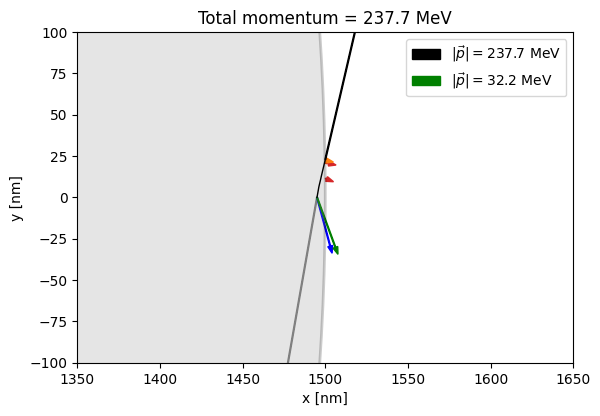

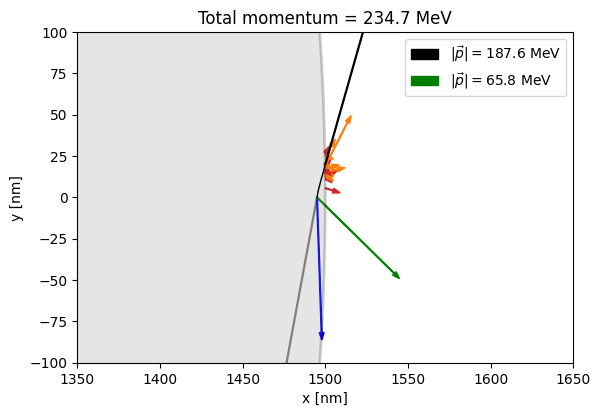

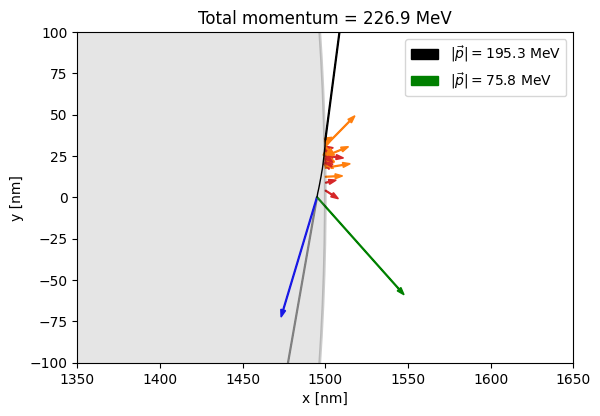

In [ ]:
importlib.reload(ar)
for i in range(1,10):
    fig = ar.plot_transmitted(daught_dict, recoil_dict,i, sim_thick=5)